# SALES INSIGHTS 💡

### By: Yashita Vajpayee

## Abstract: 

This projects aims to explore the transaction dataset of a computer hardware company to get insights on their sales by exploring factors like market, customers, product sales, sale amount etc.


## Ch. 1- Introduction:

AtliQ Hardware is a leading Indian-based hardware company that delivers computer hardware and peripherals to its clients across India. Despite having several branches throughout the country, the company has been facing a significant decline in sales, which has become a major concern for the sales director. As the company's performance continues to decline, the sales director is struggling to identify the underlying issues contributing to this trend.

In this project, we aimed to analyze the sales data of AtliQ Hardware and provide insights that could help the sales director better understand the business's performance. Specifically, we focused on identifying the factors that may be contributing to the declining sales and providing recommendations for addressing these issues. We performed exploratory data analysis, created visualizations, and performed various statistical analyses, including comparing two samples, ANOVA, Categorical data analysis and hypothesis testing, to achieve our objectives. We further did prediction analysis using Linear regression and polynomial regression.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import shapiro
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

## Ch. 2 -  Data Description

The dataset contains following columns:
- `product_code`: This is the code given to each product which is sold by the company
- `customer_code`: Every customer has been a given a code for better analysis	
- `market_code`: Code given to each city/branch where products are supplied
- `order_date`: Date of ordering	
- `sales_qty`: Quantity ordered
- `sales_amount`: This is selling amount of the product sold
- `currency` : There items sold in either INR and USD
- `cost_price` : This is the cost price of the product 


In [2]:
data = pd.read_csv("transaction.csv")

In [3]:
data.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,cost_price
0,Prod279,Cus020,Mark011,2017-10-11,1,102.0,INR,62.22
1,Prod279,Cus020,Mark011,2017-10-18,1,102.0,INR,114.24
2,Prod279,Cus020,Mark011,2017-10-19,1,102.0,INR,72.42
3,Prod279,Cus020,Mark011,2017-11-08,1,102.0,INR,65.28
4,Prod279,Cus020,Mark011,2018-03-09,1,102.0,INR,137.70


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148395 entries, 0 to 148394
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   product_code   148395 non-null  object 
 1   customer_code  148395 non-null  object 
 2   market_code    148395 non-null  object 
 3   order_date     148395 non-null  object 
 4   sales_qty      148395 non-null  int64  
 5   sales_amount   148395 non-null  float64
 6   currency       148395 non-null  object 
 7   cost_price     148395 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 9.1+ MB


In [5]:
data.describe()

,sales_qty,sales_amount,cost_price
count,148395.000000,1.483950e+05,1.483950e+05
mean,16.370376,6.636433e+03,6.470649e+03
std,115.394269,3.008649e+04,2.977992e+04
min,1.000000,5.000000e+00,3.050000e+00
25%,1.000000,1.760000e+02,1.665000e+02
50%,1.000000,5.190000e+02,5.082600e+02
75%,7.000000,3.065000e+03,2.907130e+03
max,14049.000000,1.510944e+06,1.846742e+06


### Data manipulation:

The dataset provides a good information about the sales data of the company, but for better analysis, following alterations have been done in the dataset:

* **Currency manipulation and Price Normalization :** The currencies are available in `INR` and `USD` format. For consistency, I converted all the `INR` enteries into `USD` by normalizing the `sales_amount` and `cost_price`
<br>

* **`profit` and `profit_percentage` :**  As we are talking about sales, it is important to look at the profit margin and profit percentage for each transaction by the company. Therefore by using `sales_amount` and `cost_price` in each row, I calculated the profits.
<br>
* **Dates manipulation :** The date is given in the "yyyy-mm-dd" format. For analyzing the yearly trends in the sales, I added a column as `year`
<br>
* **For categorical analysis :** There is no column explicitely having categories in the dataset. Therefore, I added a column as ` sales_qty_interval` which categorizes the sales quantity into - `Low`,`Medium` and`High`
<br>
* **Label encoding :** For performing predictive analysis using regression, it was needed to convert  object datatypes to int or float datatypes. Therefore I used label encoding for `product_code`, `customer_code` and `market_code`	columns

##### 1.Currency manipulation and Price Normalization

In [6]:
# Find the rows with currency other than INR
other_currency = data[~(data['currency'].isin(['INR']))]

# Print the rows with currency other than INR
if len(other_currency) > 0:
    print("Rows with currency other than INR:")
    print(other_currency)
else:
    print("No currency other than INR found.")

Rows with currency other than INR:
       product_code customer_code market_code  order_date  sales_qty  \
135937      Prod003        Cus005     Mark004  2017-11-20         59   
135938      Prod003        Cus005     Mark004  2017-11-22         36   

        sales_amount currency  cost_price  
135937         500.0      USD     25875.0  
135938         250.0      USD     15562.5  


In [7]:
## using 1 USD = 80 INR
data['sales_amount'] = data['sales_amount'] / 80   
data['cost_price'] = data['cost_price'] / 80
data = data.drop('currency', axis=1)
data.head(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,cost_price
0,Prod279,Cus020,Mark011,2017-10-11,1,1.275,0.77775
1,Prod279,Cus020,Mark011,2017-10-18,1,1.275,1.42800
2,Prod279,Cus020,Mark011,2017-10-19,1,1.275,0.90525


##### 2. Profit margin and Profit percentage

- Creating new columns `profit` and `profit_percentage` using `sales_amount` and `cost_price`

In [8]:
data['profit'] = data['sales_amount'] - data['cost_price']
data['profit_percentage'] = data['profit'] / data['sales_amount'] * 100
data.head(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,cost_price,profit,profit_percentage
0,Prod279,Cus020,Mark011,2017-10-11,1,1.275,0.77775,0.49725,39.0
1,Prod279,Cus020,Mark011,2017-10-18,1,1.275,1.42800,-0.15300,-12.0
2,Prod279,Cus020,Mark011,2017-10-19,1,1.275,0.90525,0.36975,29.0


##### 3. Dates manipulation

In [9]:
# Convert the date column to datetime format
data['order_date'] = pd.to_datetime(data['order_date'], format='%Y-%m-%d')

# Extract the year from the date column and create a new column
data['year'] = data['order_date'].dt.year
data.head(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,cost_price,profit,profit_percentage,year
0,Prod279,Cus020,Mark011,2017-10-11,1,1.275,0.77775,0.49725,39.0,2017
1,Prod279,Cus020,Mark011,2017-10-18,1,1.275,1.42800,-0.15300,-12.0,2017
2,Prod279,Cus020,Mark011,2017-10-19,1,1.275,0.90525,0.36975,29.0,2017


##### 4. For categorical analysis

In [10]:
intervals = [0, 1, 7, float('inf')]
labels = ['Low', 'Medium', 'High']

# Use pd.cut() to create the intervals based on the sales_qty column
data['sales_qty_interval'] = pd.cut(data['sales_qty'], bins=intervals, labels=labels)

# Print the counts of each interval
print(data['sales_qty_interval'].value_counts())
data.head(3)

Low       80202
High      34494
Medium    33699
Name: sales_qty_interval, dtype: int64


,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,cost_price,profit,profit_percentage,year,sales_qty_interval
0,Prod279,Cus020,Mark011,2017-10-11,1,1.275,0.77775,0.49725,39.0,2017,Low
1,Prod279,Cus020,Mark011,2017-10-18,1,1.275,1.42800,-0.15300,-12.0,2017,Low
2,Prod279,Cus020,Mark011,2017-10-19,1,1.275,0.90525,0.36975,29.0,2017,Low


##### 5. Label Encoding:

In [11]:
le = LabelEncoder()

data['product_code'] = le.fit_transform(data['product_code'])
data['customer_code'] = le.fit_transform(data['customer_code'])
data['market_code'] = le.fit_transform(data['market_code'])
data.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,cost_price,profit,profit_percentage,year,sales_qty_interval
0,278,19,10,2017-10-11,1,1.275,0.77775,0.49725,39.0,2017,Low
1,278,19,10,2017-10-18,1,1.275,1.42800,-0.15300,-12.0,2017,Low
2,278,19,10,2017-10-19,1,1.275,0.90525,0.36975,29.0,2017,Low
3,278,19,10,2017-11-08,1,1.275,0.81600,0.45900,36.0,2017,Low
4,278,19,10,2018-03-09,1,1.275,1.72125,-0.44625,-35.0,2018,Low


### Visualizations: 

#### 1) Sales Amount and Cost Price over Time
* Understanding the trend of Sales amount and Cost proce over the years.
* It can be seen that both the prices saw an increase from 2017 to 2018
* There was a declination from 2018 to 2019
* After 2019, there was an increase in the prices, but the difference between Sales amount and Cost price started to lessen

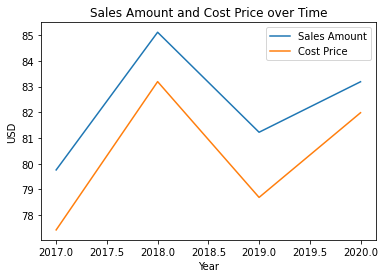

In [12]:
## Plotting the graph

sns.lineplot(x='year', y='sales_amount', data=data, label='Sales Amount', ci=None)
sns.lineplot(x='year', y='cost_price', data=data, label='Cost Price', ci=None)

plt.title('Sales Amount and Cost Price over Time')
plt.xlabel('Year')
plt.ylabel('USD')
plt.legend()

plt.show()


#### 2) Profit over Time

* It shows after the year 2019, there was a significant decline in the profit of the products
* This was stated by the Sales director

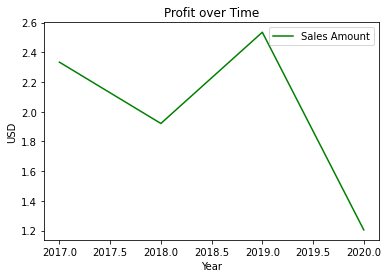

In [13]:
sns.lineplot(x='year', y='profit', data=data, label='Sales Amount',color = 'green', ci=None)

plt.title('Profit over Time')
plt.xlabel('Year')
plt.ylabel('USD')
plt.legend()

plt.show()

#### 3) Top customers by sales amount

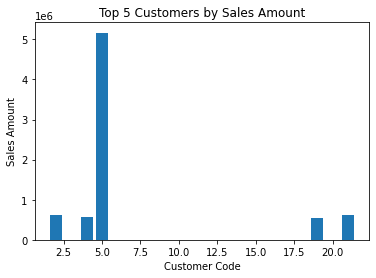

In [14]:
import matplotlib.pyplot as plt

# Group the data by customer code and sum the sales amount
customer_sales = data.groupby('customer_code')['sales_amount'].sum()

customer_sales = customer_sales.sort_values(ascending=False)

# Get the top 5 customers based on sales amount
top_customers = customer_sales.nlargest(5)

# Plot the bar chart
plt.bar(top_customers.index, top_customers.values)
plt.title('Top 5 Customers by Sales Amount')
plt.xlabel('Customer Code')
plt.ylabel('Sales Amount')
plt.show()


#### 4) Market by sales amount

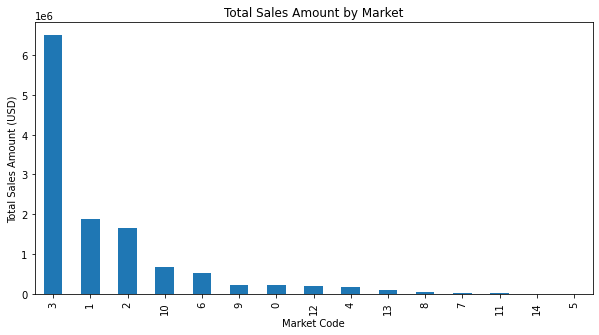

In [15]:
# group the data by market_code and calculate the total sales amount for each market
market_sales = data.groupby('market_code')['sales_amount'].sum()

# sort the market sales data in descending order
market_sales = market_sales.sort_values(ascending=False)

# create a bar plot of the market sales data
market_sales.plot(kind='bar', figsize=(10, 5))

# set the plot title and axis labels
plt.title('Total Sales Amount by Market')
plt.xlabel('Market Code')
plt.ylabel('Total Sales Amount (USD)')

# display the plot
plt.show()

#### 5) Profit by market

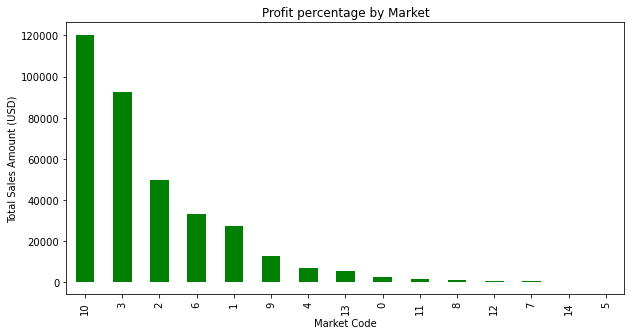

In [16]:
# group the data by market_code and calculate the total sales amount for each market
market_sales = data.groupby('market_code')['profit_percentage'].sum()

# sort the market sales data in descending order
market_sales = market_sales.sort_values(ascending=False)

# create a bar plot of the market sales data
market_sales.plot(kind='bar', figsize=(10, 5), color = 'green')

# set the plot title and axis labels
plt.title('Profit percentage by Market')
plt.xlabel('Market Code')
plt.ylabel('Total Sales Amount (USD)')

# display the plot
plt.show()

* By analyzing the top markets by the Total sales amount and Profit percentage, it can be seen that Top 5 markets are `1`,`2`,`3`,`6`,`10`, But the rankings differed.

* While market `3` was leading in terms of sales_amount, market `10` showed better profit results

#### 6)Tableu Visualizations:

##### Profit by Market
<img src='Screenshot 2023-05-01 at 1.54.25 PM.png' width="40%">

##### Revenue by Market
<img src='Screenshot 2023-05-01 at 1.54.15 PM.png' width="40%">

##### Revenue trend
<img src='Screenshot 2023-05-01 at 1.53.56 PM.png' width="580%">

##### Profit trend
<img src='Screenshot 2023-05-01 at 1.52.36 PM.png' width="80%">

## Ch. 3 -  Methodologies

#### Following are the methodologies which will be used to statistically and predictively analyze the data:

* **1. Comparing Two Samples:**
The t-test and z-test are commonly used methods for comparing two samples. The t-test is used when the sample size is small, and the population standard deviation is unknown. The z-test, on the other hand, is used when the sample size is large, and the population standard deviation is known. These tests are used to determine whether the means of two samples are significantly different from each other.
<br>

* **2. The Analysis of Variance (ANOVA):**
ANOVA is a statistical method used to compare the means of two or more groups. It determines whether the differences in the means of the groups are statistically significant or whether they are simply due to random chance. ANOVA is used when there are more than two groups, and it can be used to determine which groups are significantly different from each other.
<br>
* **3. The Analysis of Categorical Data:**
The analysis of categorical data involves analyzing data that is divided into categories. This type of data is often represented in contingency tables. Methods such as chi-square test and Fisher's exact test are used to analyze categorical data. These tests are used to determine whether the differences in the distribution of the categories are statistically significant or whether they are simply due to random chance.
<br>
* **4. Linear Regression:**
Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. It is used to determine the strength and direction of the relationship between the variables. The method involves fitting a linear equation to the data and estimating the coefficients of the equation.
<br>
* **5. Resampling Methods:**
Resampling methods involve creating new samples from the original data set. These methods are used when the sample size is small or when the data is not normally distributed. Two common resampling methods are bootstrap and permutation tests. These methods are used to estimate the variability of a statistic and to determine whether the differences in the statistics are statistically significant.
<br>
* **6. Linear Model Selection and Regularization:**
Linear model selection and regularization methods are used to select the best subset of variables for a linear regression model. These methods involve adding or removing variables from the model to improve its predictive power. Regularization methods involve adding a penalty term to the regression equation to prevent overfitting.
<br>
* **7. Moving Beyond Linearity:**
Moving beyond linearity involves modeling the relationship between variables using nonlinear models. Nonlinear models are used when the relationship between variables is not linear. Methods such as logistic regression and polynomial regression are used to model nonlinear relationships. These methods are used to determine the strength and direction of the relationship between variables and to make predictions.

## Ch.4 - Implementations, Analysis and Results 

### 4.1 Comparing two samples:

*  Using comparison of two samples (z-test) to test whether the mean profit margin in one group is significantly different from the mean profit margin in the other group.
* For this, I am taking two different market for analysis.
* As we saw different lead in the sales amount and profit percentage, I want to analyze the means of top market for both 

**Null Hypothesis (H0):** There is no significant difference in their mean of the two markets <br>
**Alternative Hypothesis (H1) :** There is significant difference in their mean of the two markets

##### Grouping by sale amount

In [17]:
import statsmodels.api as sm

# Define the two groups
group1 = data[data['market_code'] == 3]['sales_amount']
group2 = data[data['market_code'] == 1]['sales_amount']

# Calculate the mean and standard deviation for each group
mean1, std1 = group1.mean(), group1.std()
mean2, std2 = group2.mean(), group2.std()

# Calculate the standard error of the difference in means
se = ((std1**2)/len(group1) + (std2**2)/len(group2))**0.5

# Calculate the z-score
z = (mean1 - mean2) / se

# Calculate the p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

print('z-statistic:', z)
print('p-value:', p_value)

alpha = 0.05
if p_value < alpha:
    print('Reject null hypothesis; there is significant difference in profit margin percentage among markets.')
else:
    print('Fail to reject null hypothesis; there is no significant difference in profit margin percentage among markets.')


z-statistic: -3.8252330746901113
p-value: 0.00013064842292509482
Reject null hypothesis; there is significant difference in profit margin percentage among markets.


##### Grouping by profit percentage

In [18]:
import statsmodels.api as sm

# Define the two groups
group1 = data[data['market_code'] == 3]['profit_percentage']
group2 = data[data['market_code'] == 10]['profit_percentage']

# Calculate the mean and standard deviation for each group
mean1, std1 = group1.mean(), group1.std()
mean2, std2 = group2.mean(), group2.std()

# Calculate the standard error of the difference in means
se = ((std1**2)/len(group1) + (std2**2)/len(group2))**0.5

# Calculate the z-score
z = (mean1 - mean2) / se

# Calculate the p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

print('z-statistic:', z)
print('p-value:', p_value)

alpha = 0.05
if p_value < alpha:
    print('Reject null hypothesis; there is significant difference in profit margin percentage among markets.')
else:
    print('Fail to reject null hypothesis; there is no significant difference in profit margin percentage among markets.')


z-statistic: -1.9019719655317198
p-value: 0.057174819742147553
Fail to reject null hypothesis; there is no significant difference in profit margin percentage among markets.


### 4.2. ANOVA

- Using ANOVA (analysis of variance) test to test whether there is a significant difference in the mean profit margin across the groups (here markets). 

In [19]:
# Step 1: Divide the data into groups based on market code
groups = [data[data['market_code'] == code]['profit'] for code in data['market_code'].unique()]

# Step 2: Perform an ANOVA test
f_stat, p_value = stats.f_oneway(*groups)
print('One-way ANOVA results:')
print('F-statistic:', f_stat)
print('p-value:', p_value)

# Step 3: Interpret the results
alpha = 0.05
if p_value < alpha:
    print('Reject null hypothesis: there is significant difference in profit margin percentage among markets.')
else:
    print('Fail to reject null hypothesis: there is no significant difference in profit margin percentage among markets.')


One-way ANOVA results:
F-statistic: 28.52623123850937
p-value: 2.218324719096583e-76
Reject null hypothesis: there is significant difference in profit margin percentage among markets.


**Since the null hypotheis is rejected, Tukeys test is done**

### Tukeys test

In [20]:
import statsmodels.stats.multicomp as mc

# Step 1: Divide the data into groups based on market code
groups = [data[data['market_code'] == code]['profit'] for code in data['market_code'].unique()]

# Step 2: Perform Tukey's test
if p_value < alpha:
    tukey = mc.MultiComparison(data['profit'], data['market_code'])
    result = tukey.tukeyhsd()
    print('Tukey test results:')
    print(result)
else:
    print('Cannot perform Tukey test as ANOVA test did not reject null hypothesis')


Tukey test results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     0      1    1.7253    1.0   -7.7223   11.1728  False
     0      2   -1.8778    1.0  -11.1527    7.3972  False
     0      3   -0.2914    1.0   -9.4417    8.8589  False
     0      4   -3.9478 0.9953   -14.519    6.6234  False
     0      5  -72.8825 0.0978 -150.9221    5.1571  False
     0      6   -2.6712 0.9998  -12.0619    6.7195  False
     0      7    0.0905    1.0  -29.7531   29.9341  False
     0      8    2.0125    1.0  -15.0483   19.0733  False
     0      9    -1.868    1.0   -11.814     8.078  False
     0     10   -3.2845 0.9969  -12.4273    5.8582  False
     0     11    0.2744    1.0  -16.7712     17.32  False
     0     12  158.6367    0.0  127.6844   189.589   True
     0     13   -3.3663 0.9995   -14.465    7.7325  False
     0     14     0.318    1.0  -28.5415   29.1775  

### 4.3 The Analysis of Categorical Data
* For this task I am using `sales_qty_interval` which categorizes the sales quantitiy into `Low`, `Medium` and `High` along with `year` to compare these categories
* Contingency table will be created and we can analyze the trend in sales quantity over the years

In [21]:
from scipy.stats import chi2_contingency

# create a contingency table
table = pd.crosstab(data['sales_qty_interval'], data['year'])
table

year,2017,2018,2019,2020
sales_qty_interval,,,,
Low,7916,33470,27425,11391
Medium,3351,13379,12125,4844
High,3290,13906,12162,5136


**Null Hypothesis :** There is no association between sales quantity and year, i.e., they are independent <br>
**Alternative Hypothesis :**  There is a significant association between the two 

In [22]:
# perform chi-square test
chi2, p, dof, expected = chi2_contingency(table)

print('Chi-square statistic:', chi2)
print('p-value:', p)

alpha = 0.05
if p < alpha:
    print('Reject null hypothesis: there is a significant association between sales quantity interval and year.')
else:
    print('Fail to reject null hypothesis: there is no significant association between sales quantity interval and year.')



Chi-square statistic: 63.53181516602004
p-value: 8.59924582047769e-12
Reject null hypothesis: there is a significant association between sales quantity interval and year.


In [23]:
data.head(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,cost_price,profit,profit_percentage,year,sales_qty_interval
0,278,19,10,2017-10-11,1,1.275,0.77775,0.49725,39.0,2017,Low
1,278,19,10,2017-10-18,1,1.275,1.42800,-0.15300,-12.0,2017,Low
2,278,19,10,2017-10-19,1,1.275,0.90525,0.36975,29.0,2017,Low


### Now we are moving into Predictive analysis part
* Since the purpose of this project was to analyze data to have better profits for the company, I used `profit` as my target variable(y)
* The input features (X) for analysis were `product_code`, `customer_code`, `market_code`,`sales_qty`,`sales_amount`and `cost_price`

### 4.4 Linear Regression

In [24]:
X = data[['product_code', 'customer_code', 'market_code', 'cost_price','sales_amount','sales_qty','year']]
y = data['profit']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create an instance of the linear regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

# Evaluate the model performance using R^2 score
score = lr_model.score(X_test, y_test)
print("R^2 score:", score)

R^2 score: 1.0


In [26]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 2.8136272531885117e-24


**Analysis :** Getting an R2 score of 1 is ideal output, but it also mean that our model is overfitted. We can implement resampling techniques like Cross-validation and Bootstrapping to ensure the model is not overfitted

### 4.5 Resampling

#### 4.5.i Cross-Validation

In [27]:
from sklearn.model_selection import cross_val_score

# Create an instance of the linear regression model
lr_model = LinearRegression()

# Perform 5-fold cross-validation
scores = cross_val_score(lr_model, X, y, cv=5)

# Print out the R2 scores for each fold
print("Cross-validation scores:", scores)
print("Average R^2 score:", scores.mean())


Cross-validation scores: [1. 1. 1. 1. 1.]
Average R^2 score: 1.0


* The result shows that the model accuracy remains same after using Cross-validation. We can use paramater tuning to improve this.

### 4.6 Linear Model Selection and Regularization

#### Ridge regularization

In [28]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Create an instance of the Ridge regression model
ridge_model = Ridge()

# Create an instance of the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(ridge_model, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Predict on the test data using the best model found by GridSearchCV
y_pred = grid_search.predict(X_test)

# Evaluate the model performance using R^2 score
score = grid_search.score(X_test, y_test)
print("R^2 score:", score)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)


R^2 score: 1.0
Best hyperparameters: {'alpha': 0.01}


#### Lasso regularization

In [29]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Create an instance of the Lasso regression model
lasso_model = Lasso()

# Create an instance of the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(lasso_model, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Predict on the test data using the best model found by GridSearchCV
y_pred = grid_search.predict(X_test)

# Evaluate the model performance using R^2 score
score = grid_search.score(X_test, y_test)
print("R^2 score:", score)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)


R^2 score: 0.9999996082953018
Best hyperparameters: {'alpha': 1}


### 4.7 Moving Beyond Linearity

### Polynomial regression

In [30]:
### Using 2- degree polynomial

from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features up to degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Create an instance of the linear regression model
lr_model_poly = LinearRegression()

# Fit the model to the training data
lr_model_poly.fit(X_poly_train, y_train)

# Predict on the test data
y_pred_poly = lr_model_poly.predict(X_poly_test)

# Evaluate the model performance using R^2 score
score_poly = lr_model_poly.score(X_poly_test, y_test)
print("R^2 score (polynomial regression):", score_poly)


R^2 score (polynomial regression): 1.0


In [31]:
### Using 3- degree polynomial

from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features up to degree 3
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Create an instance of the linear regression model
lr_model_poly = LinearRegression()

# Fit the model to the training data
lr_model_poly.fit(X_poly_train, y_train)

# Predict on the test data
y_pred_poly = lr_model_poly.predict(X_poly_test)

# Evaluate the model performance using R^2 score
score_poly = lr_model_poly.score(X_poly_test, y_test)
print("R^2 score (polynomial regression):", score_poly)



R^2 score (polynomial regression): 0.999999999999951


## Conclusion

Based on the analysis conducted in this project, several insights can be drawn about the sales and profits of the company:

* Firstly, the company seems to have a positive growth trend in terms of sales over the years. This is supported by the increasing trend observed in the total sales amount. An increase in the profit can also be seen till year 2019, though there is a decrease in year 2020.

* Secondly, the company has a varied customer base across different markets and customer segments. By analyzing the sales and profits across different markets and customer segments, the company can gain insights into its target markets and customer segments.

* Thirdly, there seems to be a positive correlation between the sales quantity and year . Therefore, the company can focus on improving its sales strategies to increase sales, which in turn, can lead to increased profits.

* Finally, using machine learning techniques, such as linear regression, the company can predict its profit amount based on various input features. This can aid in future decision-making and strategy planning.

Overall, this project provides valuable insights for the company to improve its sales and profits and make data-driven decisions.


## References

* Rice, J. A. (2006). Mathematical statistics and data analysis. Cengage Learning.

* James, G., Witten, D., Hastie, T., & Tibshirani, R. (2015). An Introduction to Statistical Learning with Applications in R, Edn. 6th.

* Pawar, Aishwarya. (2022). Data Analysis Using Statistical Methods: Case Study of Categorizing the Species of Penguin.

* https://github.com/notramm/Sales-Insight-Dashboard-using-Power-BI